In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle

In [3]:
df = pd.read_excel('C:/Users/Администратор/Desktop/Учеба КФУ/Диплом/ИАД/table_new_2.xlsx')

In [4]:
df.shape

(11974, 12)

In [5]:
df1=df._get_numeric_data()

In [6]:
df2= df1.fillna(0)

In [7]:
df2.head(5)

,Сводный индикатор,"2020, Внеоборотные активы, RUB","2020, Оборотные активы, RUB","2020, Активы всего, RUB","2020, Уставный капитал , RUB","2020, Капитал и резервы, RUB","2020, Долгосрочные обязательства, RUB","2020, Краткосрочные обязательства, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB"
0,0,0.0,1.845000e+06,1.845000e+06,0.0,1701000.0,0.0,1.440000e+05,4.423000e+06,1302000.0
1,0,0.0,1.900000e+06,1.900000e+06,10000.0,1584000.0,0.0,3.160000e+05,1.029200e+07,1479000.0
2,0,2666000.0,1.055700e+07,1.322300e+07,0.0,4015000.0,0.0,9.208000e+06,9.333800e+07,3085000.0
3,1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0,4444000.0,4.405974e+09,4.410418e+09,10000.0,15731000.0,16161000.0,4.378526e+09,3.468473e+09,1368000.0


In [8]:
df3 = df2.astype(int)

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Сводный индикатор                       11974 non-null  int32
 1   2020, Внеоборотные активы, RUB          11974 non-null  int32
 2   2020, Оборотные активы, RUB             11974 non-null  int32
 3   2020, Активы  всего, RUB                11974 non-null  int32
 4   2020, Уставный капитал , RUB            11974 non-null  int32
 5   2020, Капитал и резервы, RUB            11974 non-null  int32
 6   2020, Долгосрочные обязательства, RUB   11974 non-null  int32
 7   2020, Краткосрочные обязательства, RUB  11974 non-null  int32
 8   2020, Выручка, RUB                      11974 non-null  int32
 9   2020, Чистая прибыль (убыток), RUB      11974 non-null  int32
dtypes: int32(10)
memory usage: 467.9 KB


In [10]:
target_variable_name = 'Сводный индикатор'
training_values = df3[target_variable_name]
training_points = df3.drop(target_variable_name, axis=1)

In [10]:
X, y = training_points, training_values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()
model

LogisticRegression()

In [14]:
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
pred1=model.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred1)
score

0.6523796270526023

In [17]:
from sklearn.metrics import classification_report

In [18]:
report = classification_report(y_test, pred1, target_names=['низкий', 'высокий'])
print(report)

              precision    recall  f1-score   support

      низкий       0.65      0.97      0.78      2299
     высокий       0.62      0.09      0.16      1294

    accuracy                           0.65      3593
   macro avg       0.64      0.53      0.47      3593
weighted avg       0.64      0.65      0.56      3593



In [19]:
from sklearn.metrics import precision_score

In [20]:
precision = precision_score(y_test, pred1)
precision

0.6216216216216216

In [21]:
from sklearn.metrics import recall_score

In [22]:
recall = recall_score(y_test, pred1)
recall

0.08887171561051005

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [24]:
fpr, tpr, treshold = roc_curve(y_test, pred1)
roc_auc = auc(fpr, tpr)
roc_auc

0.5292118473659336

In [25]:
auc = roc_auc_score(y_test, pred1)
auc

0.5292118473659336

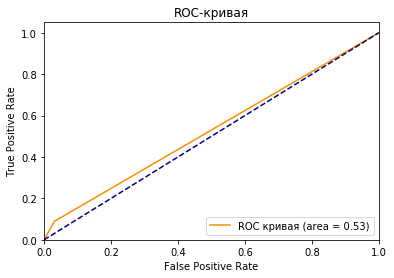

In [28]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.metrics import f1_score

In [30]:
f1_score = f1_score(y_test, pred1)
f1_score

0.1555104800540906